In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import *
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
glass=pd.read_csv("glass.csv")

In [3]:
glass.shape

(214, 10)

In [4]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
glass["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [7]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

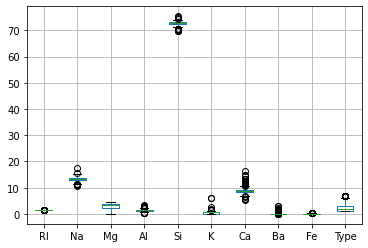

In [9]:
glass.boxplot();

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [11]:
scaler.fit_transform(glass.drop("Type", axis=1))

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [12]:
column=glass.drop("Type", axis=1).columns
column

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [13]:
column[1]

'Na'

In [14]:
glass_scaled=pd.DataFrame(scaler.fit_transform(glass.drop("Type", axis=1)),columns=column)

In [15]:
glass_scaled["Type"]=glass["Type"]

In [16]:
glass_scaled

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451,1
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451,1
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451,1
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451,1
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451,1
...,...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451,7
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451,7
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451,7
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451,7


as we can see each row has some outliers so we will build model first with outlier and one without to check accuracy

In [17]:
x=glass_scaled.drop("Type", axis=1)
y=glass_scaled["Type"]

In [18]:
org_x=glass.drop("Type", axis=1)
org_y=glass["Type"]

In [19]:
accuracy_rate=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  score=cross_val_score(knn,x,y,cv=10)
  accuracy_rate.append(score.mean())

In [20]:
accuracy_rate

[0.6582251082251082,
 0.6956709956709958,
 0.691125541125541,
 0.6584415584415585,
 0.6632034632034632,
 0.6534632034632035,
 0.6257575757575757,
 0.635064935064935,
 0.620995670995671,
 0.6305194805194805,
 0.6162337662337661,
 0.6212121212121211,
 0.6023809523809524,
 0.6164502164502164,
 0.5928571428571429,
 0.5978354978354978,
 0.5837662337662338,
 0.5744588744588743,
 0.5932900432900434,
 0.5937229437229438,
 0.5844155844155845,
 0.5703463203463204,
 0.5655844155844155,
 0.5844155844155844,
 0.5796536796536796,
 0.5751082251082251,
 0.583982683982684,
 0.5748917748917748,
 0.5794372294372295,
 0.5651515151515152,
 0.5701298701298702,
 0.5558441558441559,
 0.5608225108225107,
 0.5885281385281386,
 0.5885281385281386,
 0.5699134199134199,
 0.5837662337662337,
 0.5883116883116882,
 0.579004329004329]

In [21]:
accuracy_rate_org=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  score=cross_val_score(knn,org_x,org_y,cv=10)
  accuracy_rate_org.append(score.mean())

In [22]:
accuracy_rate_org

[0.6502164502164502,
 0.6225108225108225,
 0.6502164502164502,
 0.6454545454545455,
 0.6454545454545455,
 0.6411255411255412,
 0.6270562770562771,
 0.617965367965368,
 0.5948051948051949,
 0.6136363636363636,
 0.5898268398268398,
 0.6088744588744589,
 0.6090909090909091,
 0.6136363636363636,
 0.6041125541125542,
 0.6181818181818182,
 0.6183982683982685,
 0.6324675324675325,
 0.637012987012987,
 0.6324675324675325,
 0.6277056277056278,
 0.6419913419913421,
 0.6231601731601732,
 0.6324675324675325,
 0.6186147186147186,
 0.6324675324675325,
 0.6279220779220779,
 0.6324675324675325,
 0.6277056277056278,
 0.6277056277056278,
 0.6229437229437229,
 0.6136363636363636,
 0.6136363636363636,
 0.6088744588744589,
 0.6041125541125542,
 0.6041125541125542,
 0.6134199134199134,
 0.59004329004329,
 0.5993506493506493]

<AxesSubplot:>

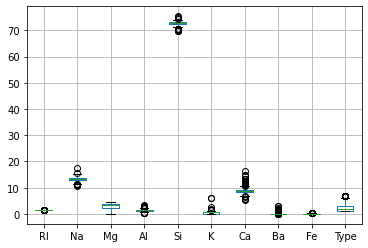

In [23]:
glass.boxplot()

<AxesSubplot:>

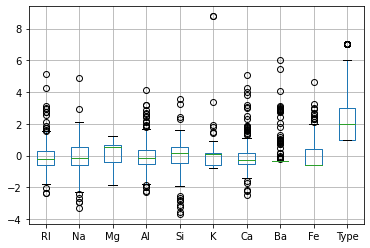

In [24]:
glass_scaled.boxplot()

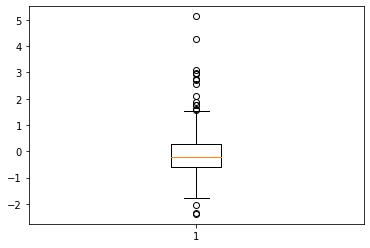

In [25]:
plt.boxplot(glass_scaled["RI"]);

<AxesSubplot:>

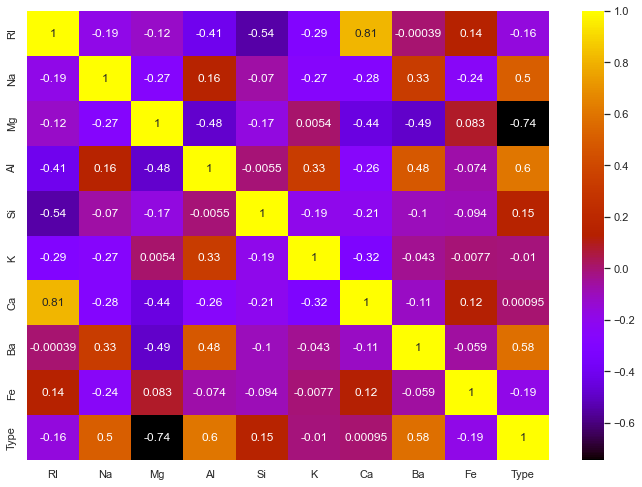

In [26]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(glass_scaled.corr(), annot=True, cmap="gnuplot")

In [27]:
glass_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [28]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [29]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [30]:
glass["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [31]:
glass[glass["Type"]==6]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
176,1.51905,14.00,2.39,1.56,72.37,0.0,9.57,0.0,0.0,6
177,1.51937,13.79,2.41,1.19,72.76,0.0,9.77,0.0,0.0,6
178,1.51829,14.46,2.24,1.62,72.38,0.0,9.26,0.0,0.0,6
179,1.51852,14.09,2.19,1.66,72.67,0.0,9.32,0.0,0.0,6
180,1.51299,14.40,1.74,1.54,74.55,0.0,7.59,0.0,0.0,6
181,1.51888,14.99,0.78,1.74,72.50,0.0,9.95,0.0,0.0,6
182,1.51916,14.15,0.00,2.09,72.74,0.0,10.88,0.0,0.0,6
183,1.51969,14.56,0.00,0.56,73.48,0.0,11.22,0.0,0.0,6
184,1.51115,17.38,0.00,0.34,75.41,0.0,6.65,0.0,0.0,6


In [32]:
elements_name=["RI",'Na','Mg','Al','Si','K','Ca','Ba','Fe']

In [33]:
glass[glass["Fe"]==0][glass["Ba"]==0]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
183,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.0,0.0,6
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.0,6
187,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.0,0.0,7
188,1.52247,14.86,2.20,2.06,70.26,0.76,9.76,0.0,0.0,7


<AxesSubplot:xlabel='Na', ylabel='Density'>

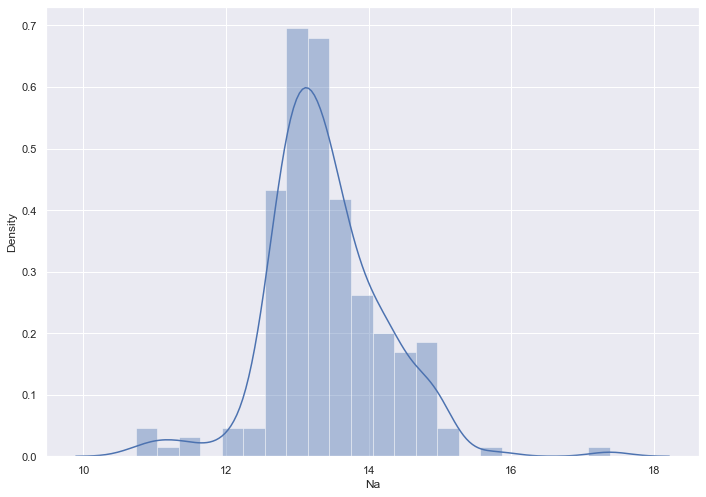

In [34]:
sns.distplot(glass["Na"])

In [35]:
glass[glass["Type"]==1].describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0
mean,1.518718,13.242286,3.552429,1.163857,72.619143,0.447429,8.797286,0.012714,0.057000,1.0
std,0.002268,0.499301,0.247043,0.273158,0.569484,0.214879,0.574807,0.083838,0.089075,0.0
min,1.512150,12.450000,2.710000,0.290000,71.350000,0.000000,7.780000,0.000000,0.000000,1.0
25%,1.517540,12.825000,3.480000,1.112500,72.080000,0.200000,8.430000,0.000000,0.000000,1.0
50%,1.517835,13.195000,3.565000,1.230000,72.815000,0.560000,8.675000,0.000000,0.000000,1.0
75%,1.519560,13.525000,3.657500,1.327500,73.017500,0.590000,9.052500,0.000000,0.110000,1.0
max,1.526670,14.770000,4.490000,1.690000,73.700000,0.690000,10.170000,0.690000,0.310000,1.0


In [36]:
glass[glass["Type"]==2].describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0
mean,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737,2.0
std,0.003802,0.664159,1.215661,0.318340,0.724573,0.213726,1.921635,0.362340,0.106433,0.0
min,1.514090,10.730000,0.000000,0.560000,69.810000,0.000000,7.080000,0.000000,0.000000,2.0
25%,1.516377,12.885000,3.057500,1.247500,72.330000,0.480000,8.037500,0.000000,0.000000,2.0
50%,1.517100,13.155000,3.520000,1.460000,72.735000,0.580000,8.275000,0.000000,0.000000,2.0
75%,1.518487,13.432500,3.622500,1.570000,73.062500,0.650000,8.915000,0.000000,0.155000,2.0
max,1.533930,14.860000,3.980000,2.120000,74.450000,1.100000,16.190000,3.150000,0.350000,2.0


In [37]:
glass[glass["Type"]==3].describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0
mean,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059,3.0
std,0.001916,0.506887,0.162786,0.347489,0.512276,0.229890,0.380111,0.036380,0.107864,0.0
min,1.516100,12.160000,3.340000,0.580000,71.360000,0.000000,8.320000,0.000000,0.000000,3.0
25%,1.516550,13.240000,3.400000,0.910000,72.040000,0.160000,8.530000,0.000000,0.000000,3.0
50%,1.517690,13.420000,3.530000,1.280000,72.640000,0.560000,8.790000,0.000000,0.000000,3.0
75%,1.518320,13.640000,3.650000,1.380000,72.700000,0.570000,8.930000,0.000000,0.090000,3.0
max,1.522110,14.320000,3.900000,1.760000,73.010000,0.610000,9.650000,0.150000,0.370000,3.0


In [38]:
glass[glass["Type"]==5].describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.0
mean,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769,5.0
std,0.003345,0.777037,0.999146,0.693920,1.282319,2.138695,2.183791,0.608251,0.155588,0.0
min,1.513160,11.030000,0.000000,1.400000,69.890000,0.130000,5.870000,0.000000,0.000000,5.0
25%,1.516660,12.730000,0.000000,1.560000,72.180000,0.380000,9.700000,0.000000,0.000000,5.0
50%,1.519940,12.970000,0.000000,1.760000,72.690000,0.580000,11.270000,0.000000,0.000000,5.0
75%,1.521190,13.270000,1.710000,2.170000,73.390000,0.970000,11.530000,0.000000,0.000000,5.0
max,1.523690,14.010000,2.680000,3.500000,73.880000,6.210000,12.500000,2.200000,0.510000,5.0


In [39]:
glass[glass["Type"]==6].describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.000000,9.0,9.0,9.0
mean,1.517456,14.646667,1.305556,1.366667,73.206667,0.0,9.356667,0.0,0.0,6.0
std,0.003116,1.084020,1.097134,0.571861,1.079467,0.0,1.449948,0.0,0.0,0.0
min,1.511150,13.790000,0.000000,0.340000,72.370000,0.0,6.650000,0.0,0.0,6.0
25%,1.518290,14.090000,0.000000,1.190000,72.500000,0.0,9.260000,0.0,0.0,6.0
50%,1.518880,14.400000,1.740000,1.560000,72.740000,0.0,9.570000,0.0,0.0,6.0
75%,1.519160,14.560000,2.240000,1.660000,73.480000,0.0,9.950000,0.0,0.0,6.0
max,1.519690,17.380000,2.410000,2.090000,75.410000,0.0,11.220000,0.0,0.0,6.0


<AxesSubplot:>

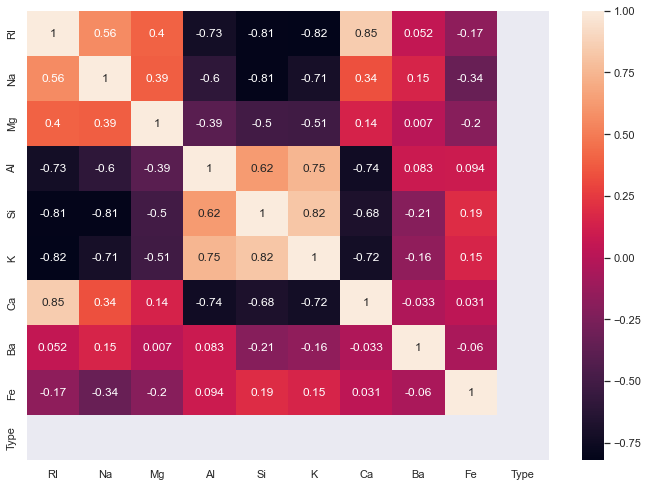

In [40]:
sns.heatmap(glass[glass["Type"]==1].corr(),annot=True)

<AxesSubplot:>

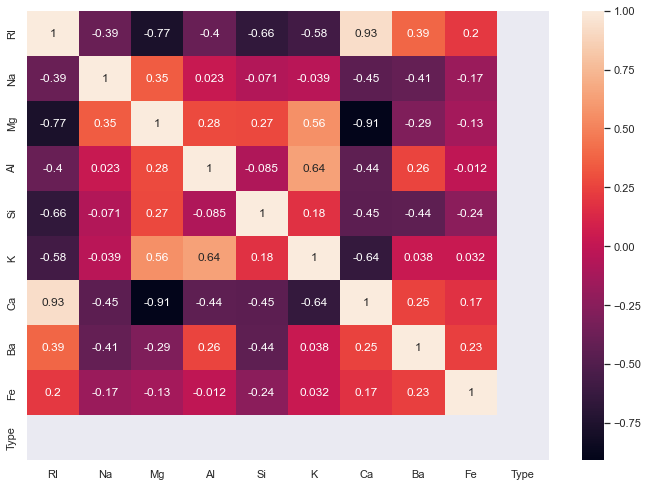

In [41]:
sns.heatmap(glass[glass["Type"]==2].corr(),annot=True)

<AxesSubplot:>

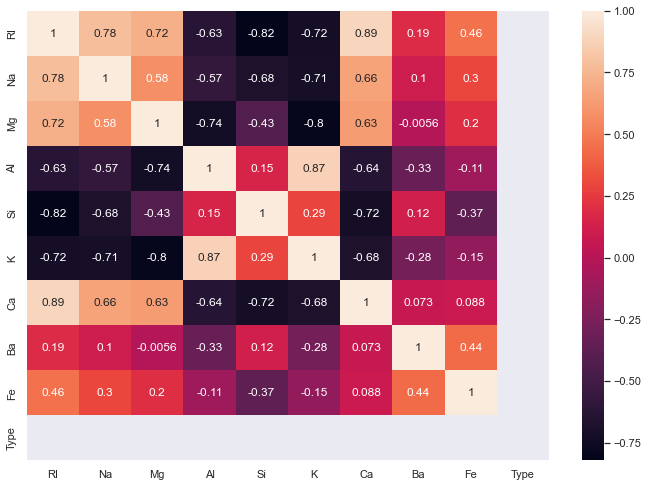

In [42]:
sns.heatmap(glass[glass["Type"]==3].corr(),annot=True)

<AxesSubplot:>

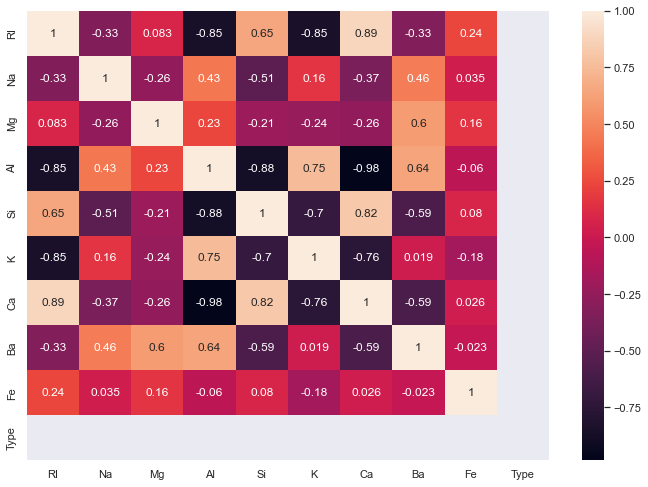

In [43]:
sns.heatmap(glass[glass["Type"]==5].corr(),annot=True)

<AxesSubplot:>

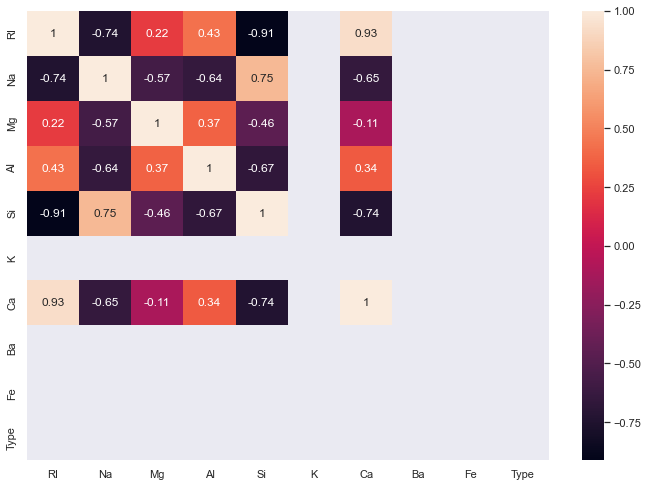

In [44]:
sns.heatmap(glass[glass["Type"]==6].corr(),annot=True)

In [47]:
elements_name

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

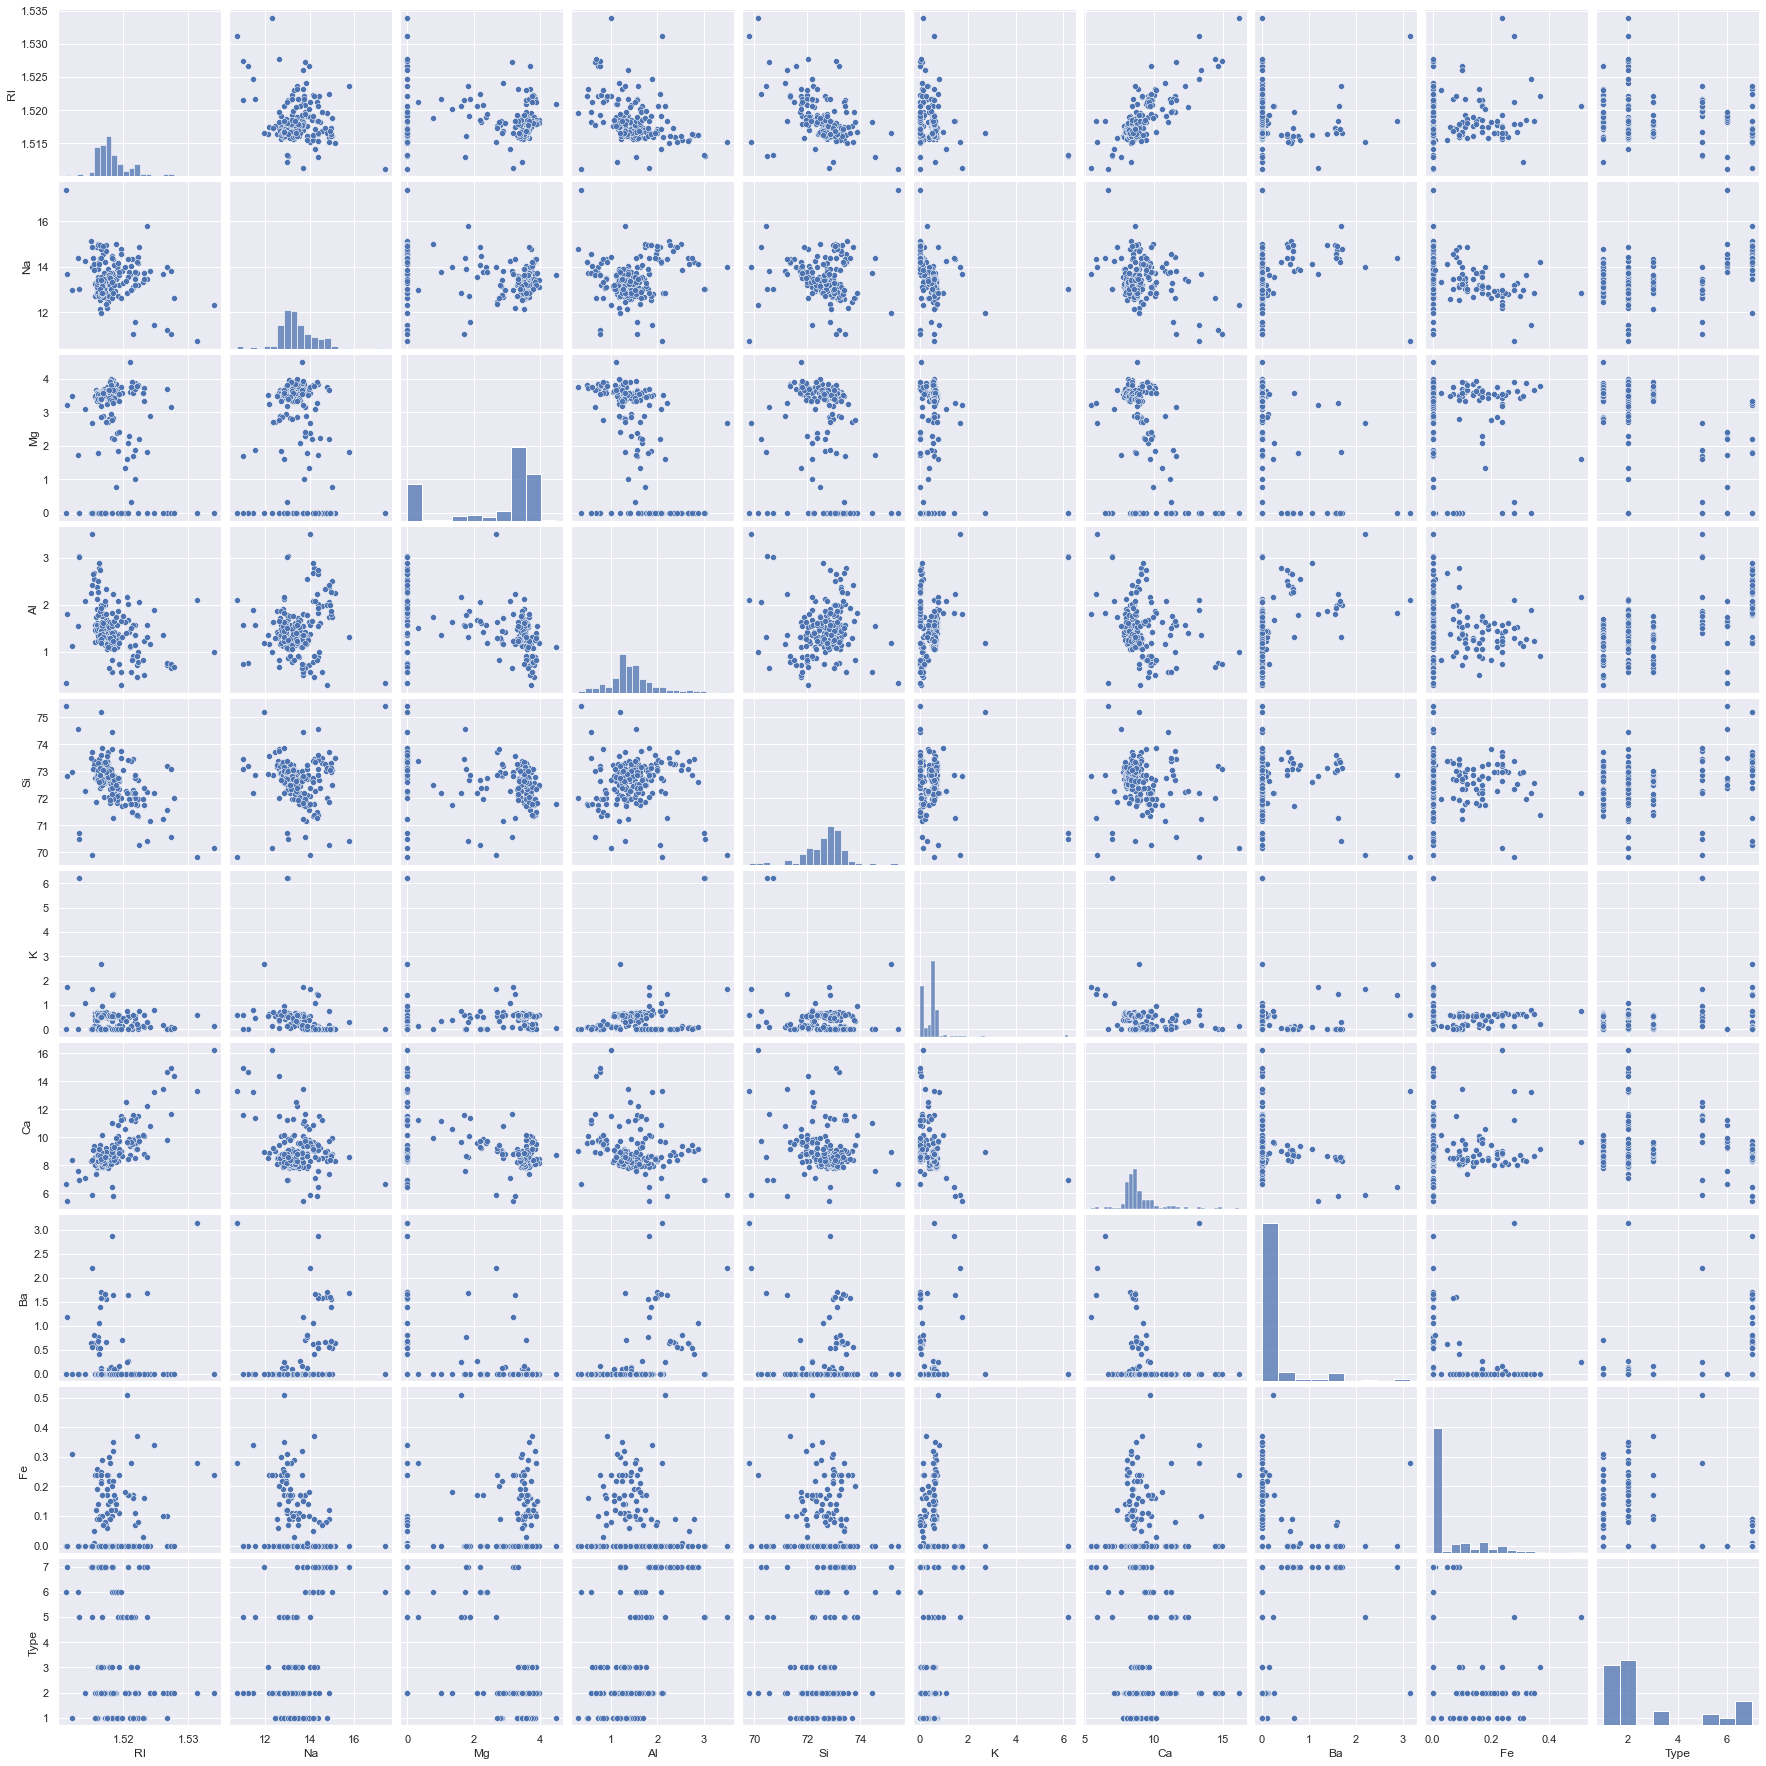

In [52]:
sns.pairplot(glass[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',"Type"]])

In [71]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [108]:
elements_used=["RI","Na","Al","Ca","Type"]

In [109]:
glass[elements_used].describe()

,RI,Na,Al,Ca,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,1.444907,8.956963,2.780374
std,0.003037,0.816604,0.499270,1.423153,2.103739
min,1.511150,10.730000,0.290000,5.430000,1.000000
25%,1.516522,12.907500,1.190000,8.240000,1.000000
50%,1.517680,13.300000,1.360000,8.600000,2.000000
75%,1.519157,13.825000,1.630000,9.172500,3.000000
max,1.533930,17.380000,3.500000,16.190000,7.000000


In [117]:
# MOdel bild without columns containing zero values

In [118]:
new_glass=glass_scaled[elements_used]

In [119]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test=train_test_split(new_glass.drop("Type", axis=1),new_glass["Type"], test_size=0.20, random_state=42)

In [120]:
x=new_glass.drop("Type", axis=1)
y=new_glass["Type"]

In [121]:
accuracy_rate=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  score=cross_val_score(knn,x,y,cv=10)
  accuracy_rate.append(score.mean())
accuracy_rate

[0.7244588744588745,
 0.6872294372294372,
 0.706060606060606,
 0.691991341991342,
 0.6783549783549784,
 0.6731601731601731,
 0.6497835497835497,
 0.6404761904761905,
 0.6311688311688313,
 0.6077922077922079,
 0.5984848484848485,
 0.593939393939394,
 0.5841991341991342,
 0.5792207792207792,
 0.5976190476190475,
 0.5932900432900433,
 0.5744588744588743,
 0.5649350649350648,
 0.5694805194805195,
 0.5742424242424242,
 0.579004329004329,
 0.5692640692640693,
 0.5696969696969696,
 0.5556277056277057,
 0.5653679653679654,
 0.5606060606060606,
 0.5560606060606061,
 0.5556277056277057,
 0.5699134199134199,
 0.5601731601731601,
 0.5701298701298702,
 0.5696969696969696,
 0.5606060606060606,
 0.5603896103896104,
 0.5651515151515152,
 0.5699134199134199,
 0.5603896103896104,
 0.5699134199134199,
 0.5746753246753247]

In [122]:
knn=KNeighborsClassifier(n_neighbors=1)

In [123]:
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.9069767441860465